In [1]:
from brainlit.utils import upload, session
from pathlib import Path
import napari
from napari.utils import nbscreenshot
import os

/Users/thomasathey/Documents/mimlab/mouselight/env/lib/python3.8/site-packages/python_jsonschema_objects/__init__.py:50: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  warnings.warn(


# Uploading Brain Images from data in the Octree format.
This notebook demonstrates uploading the 2 lowest-resolution brain volumes and a `.swc` segment file.
The upload destination could easily be set to a url of a cloud data server such as s3.

## 1) Define variables.
 - `source` and `source_segments` are the root directories of the octree-formatted data and swc files.
 - `p` is the prefix string. `file://` indicates a filepath, while `s3://` or `gc://` indicate URLs.
 - `dest` and `dest_segments` are the destinations for the uploads (in this case, filepaths).
 - `num_res` denotes the number of resolutions to upload. 
 
The below paths lead to sample data in the NDD Repo. Alter the below path definitions to point to your own local file locations. 

In [2]:
source = (Path().resolve().parents[2] / "data" / "data_octree").as_posix()
dest = (Path().resolve().parents[2] / "data" / "upload").as_uri()
dest_segments = (Path().resolve().parents[2] / "data" / "upload_segments").as_uri()
dest_annotation = (Path().resolve().parents[2] / "data" / "upload_annotation").as_uri()
num_res = 2

## 2) Upload the image data (.tif)

If the upload fails with the error: `timed out on a chunk on layer index 0. moving on to the next step of pipeline`, re-run the `upload_volumes` function but with the `continue_upload` parameter, which takes `layer index` (the layer index said in the error message) and `image index` (the last succesful image that uploaded).  

For example, if the output failed after image 19, then run 
`upload.upload_volumes(source, dest, num_res, continue_upload = (0, 19))`. Repeat this till all of the upload is complete.


In [3]:
upload.upload_volumes(source, dest, num_res)

Creating precomputed volume at layer index 1:   0%|          | 0/8 [00:00<?, ?it/s]
Finished layer index 0, took 4.546257972717285 seconds
Creating precomputed volume at layer index 1: 100%|██████████| 8/8 [00:10<00:00,  1.28s/it]
Finished layer index 1, took 10.209165096282959 seconds



## 3) Upload the segmentation data (.swc)

If uploading a `.swc` file associated with a brain volume, then use upload.py. Otherwise if uploading `swc` files with different name formats, use upload_benchmarking.py

In [4]:
upload.upload_segments(source, dest_segments, num_res)

Uploading: 100%|██████████| 1/1 [00:00<00:00, 204.38it/s]


# Download the data with NeuroglancerSession and generate labels.

In [5]:
%%capture
sess = session.NeuroglancerSession(url=dest, url_segments=dest_segments, mip=0)  # create session object object
img, bounds, vertices = sess.pull_vertex_list(2, range(250, 350), expand=True)  # get image containing some data
labels = sess.create_tubes(2, bounds, radius=1)  # generate labels via tube segmentation

## 4) Visualize the data with napari

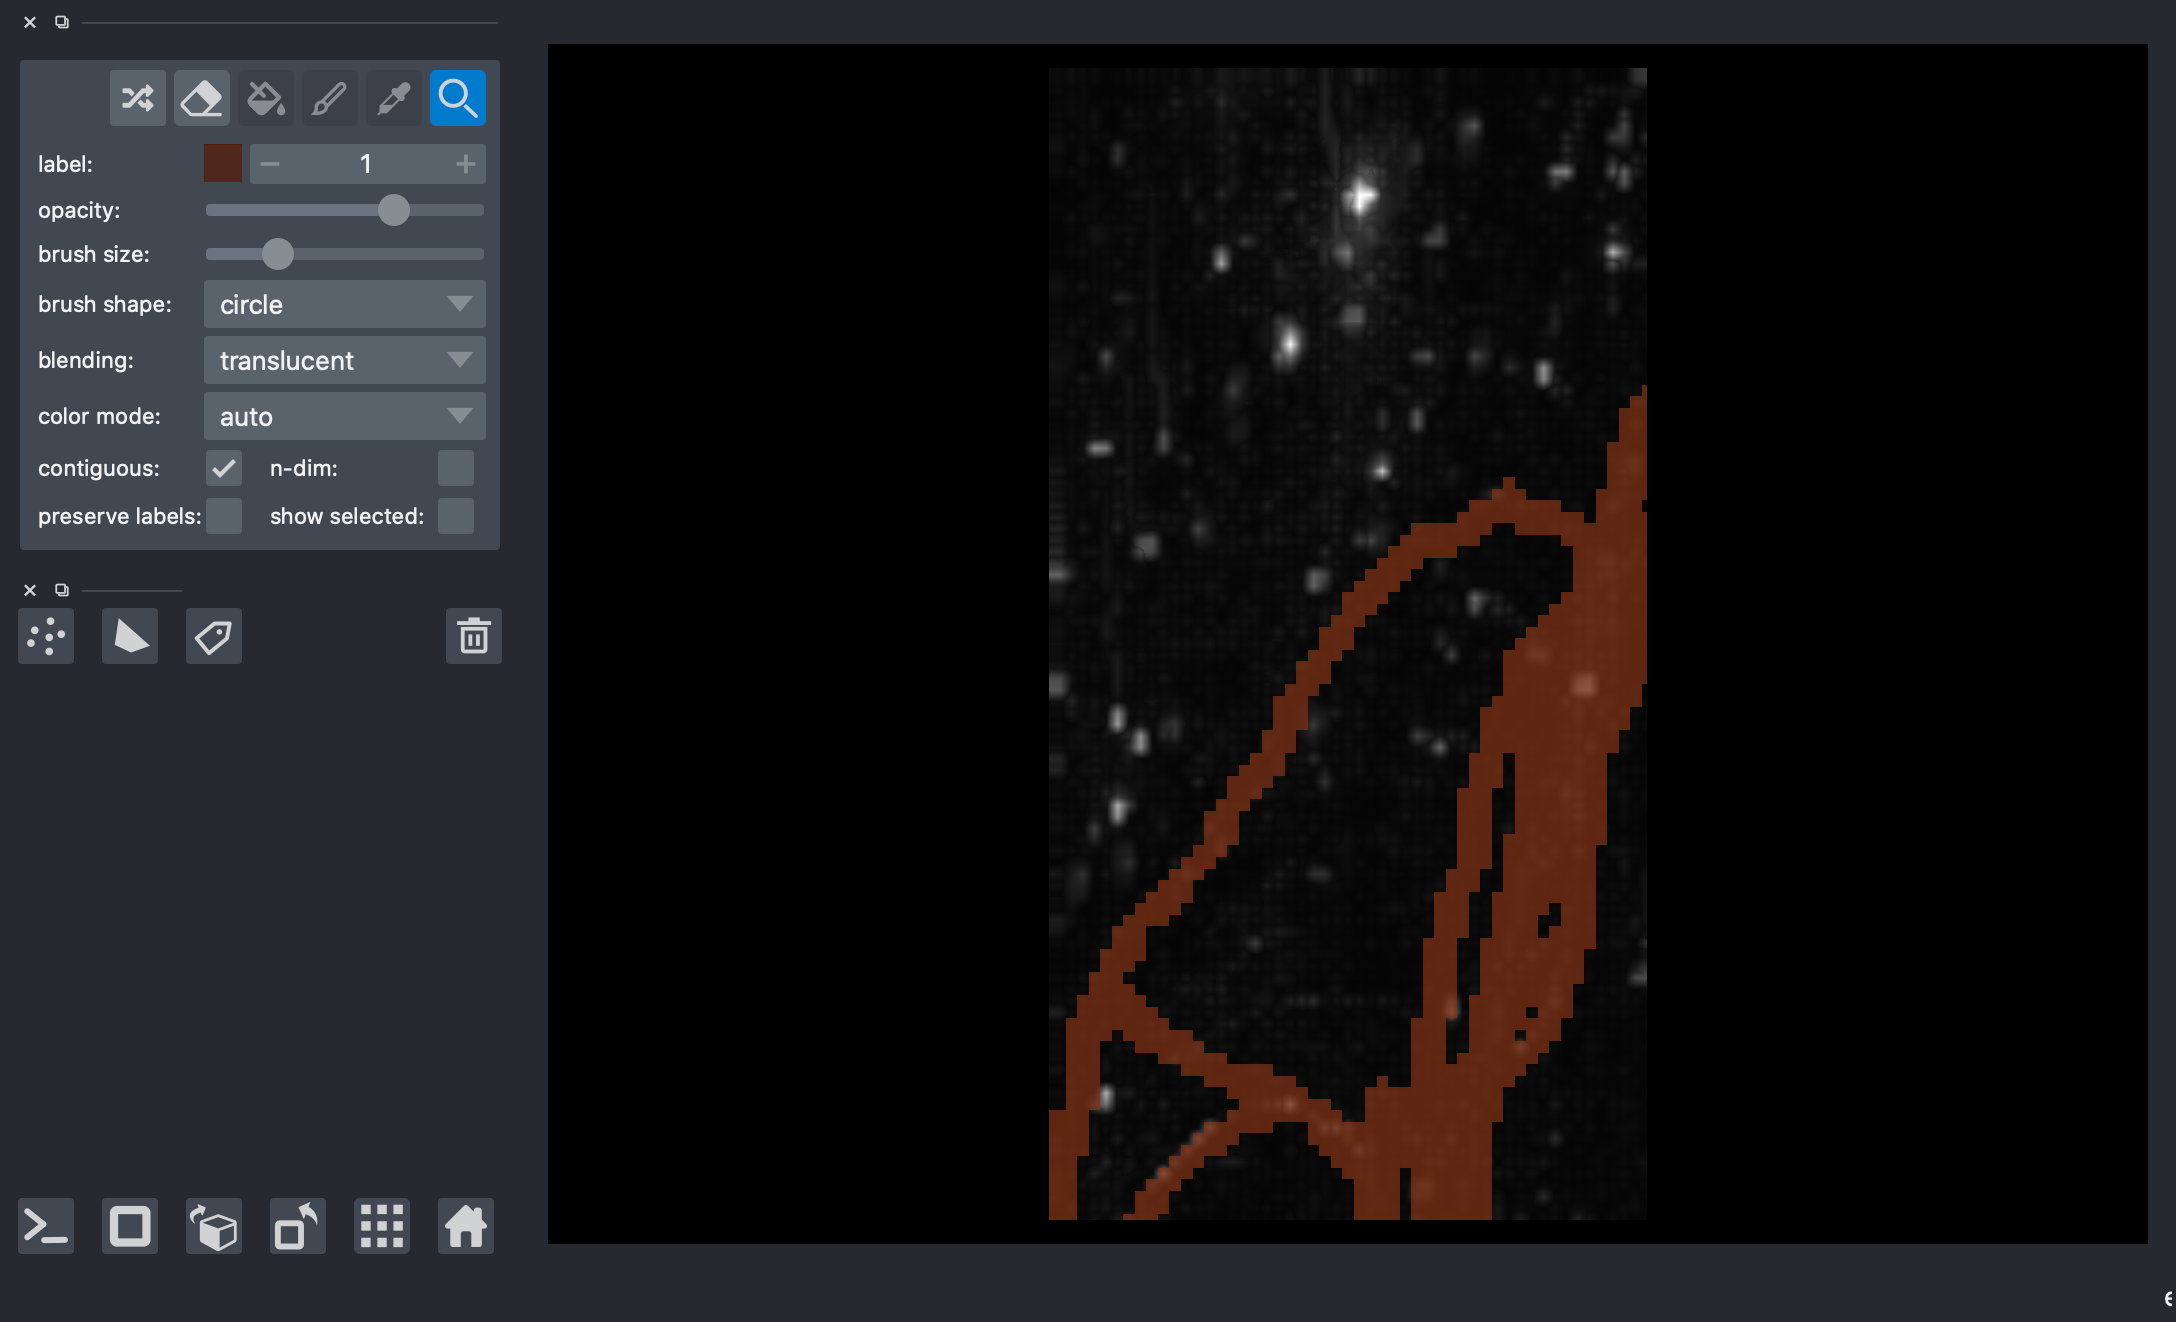

In [7]:
%gui qt
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(img)
viewer.add_labels(labels)
nbscreenshot(viewer)